<a href="https://colab.research.google.com/github/shkim123123/201920947/blob/main/F1_%EA%B9%80%EC%8A%B9%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [29]:
# Fashion MNIST 데이터셋을 로드하고 전처리합니다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [30]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0


In [31]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [32]:
# 모델을 Sequential 방식으로 정의합니다.
model = keras.Sequential()

In [33]:
# 합성곱 층과 풀링 층을 추가합니다. (1개의 합성곱층만 사용)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [34]:
# 완전 연결 층을 추가합니다. (2개의 은닉층 추가)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))  # 추가된 은닉층
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [35]:
# 모델 구조를 요약해서 출력합니다.
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               627300    
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                      

In [36]:
# 모델을 컴파일합니다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [37]:
# 모델 훈련 시, 최상의 성능을 보이는 모델을 저장하기 위한 콜백을 설정합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)


In [38]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 49s 32ms/step - loss: 0.5303 - accuracy: 0.8181 - val_loss: 0.3165 - val_accuracy: 0.8843
Epoch 2/20
   4/1500 [..............................] - ETA: 35s - loss: 0.4396 - accuracy: 0.8281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 57s 38ms/step - loss: 0.3323 - accuracy: 0.8856 - val_loss: 0.2797 - val_accuracy: 0.8963
Epoch 3/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2816 - accuracy: 0.9013 - val_loss: 0.2665 - val_accuracy: 0.9043
Epoch 4/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2512 - accuracy: 0.9116 - val_loss: 0.2653 - val_accuracy: 0.9056
Epoch 5/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2221 - accuracy: 0.9202 - val_loss: 0.2561 - val_accuracy: 0.9082
Epoch 6/20
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1997 - accuracy: 0.9299 - val_loss: 0.2505 - val_accuracy: 0.9146
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.1816 - accuracy: 0.9344 - val_loss: 0.2673 - val_accuracy: 0.9093
Epoch 8/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.1620 - accuracy: 0.9415 - val_loss: 0.2857 - val_accura

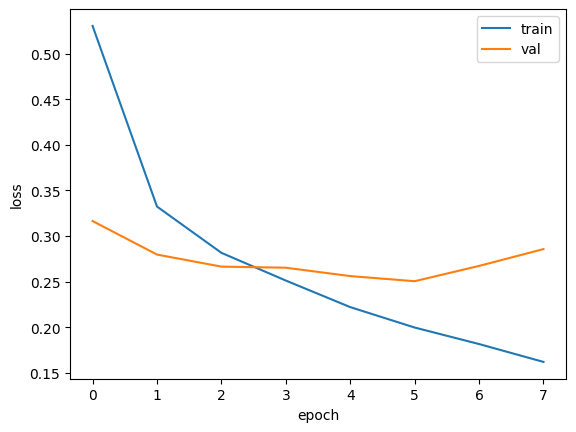

In [39]:
# 훈련 과정의 손실값과 검증 과정의 손실값을 그래프로 시각화합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [40]:
# 검증 세트에서 모델을 평가합니다.
val_loss, val_accuracy = model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 8ms/step - loss: 0.2505 - accuracy: 0.9146


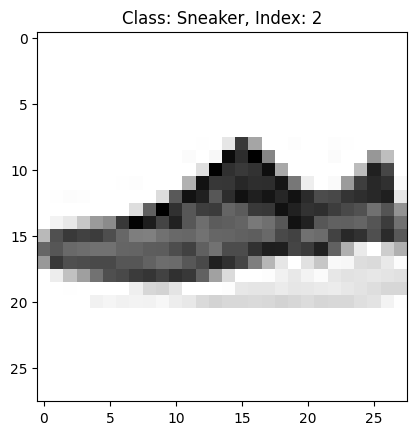

In [41]:
# 검증 세트에서 스니커즈 이미지를 찾아서 출력합니다.
sneaker_idx = np.where(val_target == 7)[0][0]  # 스니커즈 클래스 번호는 7
plt.imshow(val_scaled[sneaker_idx].reshape(28, 28), cmap='gray_r')
plt.title(f'Class: Sneaker, Index: {sneaker_idx}')
plt.show()

In [42]:
# 스니커즈 클래스 번호와 이름 출력
sneaker_class_number = 7  # Fashion MNIST에서 스니커즈 클래스 번호는 7입니다.
print(f'Sneaker class number: {sneaker_class_number}')  # 스니커즈의 클래스 번호 출력
print("스니커즈")  # "스니커즈"라고 출력


Sneaker class number: 7
스니커즈


In [43]:
test_loss, test_accuracy = model.evaluate(test_scaled, test_target)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 7s 20ms/step - loss: 0.2668 - accuracy: 0.9089
Test accuracy: 0.9089000225067139
